# primer


In [115]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [86]:
def f(x): 
    return 3*x**2 - 4*x +5

f(3.0)

20.0

In [87]:
np.linspace(-5,5, 25)

array([-5.        , -4.58333333, -4.16666667, -3.75      , -3.33333333,
       -2.91666667, -2.5       , -2.08333333, -1.66666667, -1.25      ,
       -0.83333333, -0.41666667,  0.        ,  0.41666667,  0.83333333,
        1.25      ,  1.66666667,  2.08333333,  2.5       ,  2.91666667,
        3.33333333,  3.75      ,  4.16666667,  4.58333333,  5.        ])

In [88]:
xs = np.arange(-5, 5, 0.5)
xs

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [89]:
ys = f(xs)
ys

array([100.  ,  83.75,  69.  ,  55.75,  44.  ,  33.75,  25.  ,  17.75,
        12.  ,   7.75,   5.  ,   3.75,   4.  ,   5.75,   9.  ,  13.75,
        20.  ,  27.75,  37.  ,  47.75])

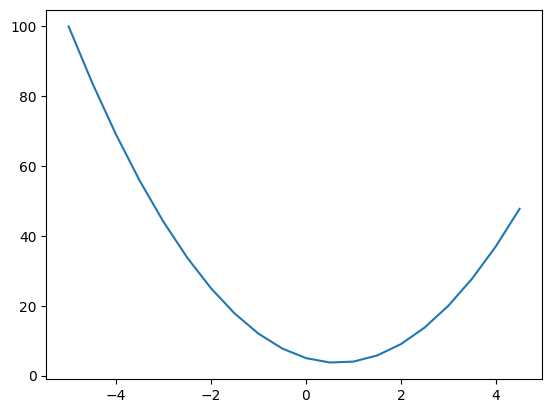

In [90]:
plt.plot(xs,ys)

In [91]:
x =3.0
h = 1.0
f(x)

20.0

In [92]:
f(x+h)

37.0

In [93]:
(f(x+h) - f(x))/h

17.0

In [94]:
# consider h~~~0  i.e. very small then 

h=0.0001

(f(x+h) - f(x))/h

14.000300000063248

In [95]:
(f(x+h) - f(x))/h

14.000300000063248

## primer over


In [96]:
a = 2.0
b = -3.0
c = 10.0

d = a* b + c
d

4.0

In [97]:

h= 0.001

a = 2.0
b = -3.0
c = 10.0

d1 = a* b + c
a+=h
print("modifying a by h")
d2 = a* b + c
print(f"d1 ={d1}")
print(f"d2 ={d2}")
print(f"slope ={(d2-d1)/h}")  # increasing a decrease  d2  by a factor of 3

modifying a by h
d1 =4.0
d2 =3.997
slope =-3.0000000000001137


In [98]:

h= 0.001

a = 2.0
b = -3.0
c = 10.0

d1 = a* b + c
b+=h
print("modifying b by h")
d2 = a* b + c
print(f"d1 ={d1}")
print(f"d2 ={d2}")
print(f"slope ={(d2-d1)/h}")  # increasing b increases  d2  by a factor of 2

modifying b by h
d1 =4.0
d2 =4.002
slope =1.9999999999997797


# graphing

In [99]:
# visualize graph

from graphviz import Digraph


def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root, format="svg", rankdir="LR"):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ["LR", "TB"]
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={"rankdir": rankdir})  # , node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(
            name=str(id(n)),
            label="{ %s| data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
            # label="{ %s| data %.4f  }" % (n.label, n.data),
            shape="record",
        )
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

# Final

In [100]:
from typing import Union
import math

class Value:
    def __init__(self,data:float, _children=(), _op:str="", label:str=""):
        self.data = data
        self.grad = 0.0 # mean no effect
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda:None  # this will be for leaf node
        

    def __repr__(self)->str:
        return f"Value(data={self.data})"
    # __str__ = __repr__

    def __str__(self)->str:
        return f"Value(data={self.data}, label={self.label})"
    
    # def __str__(self):
    #     "return string only"
    #     return f"Value(data={self.data})"

    def __add__(self, other: Union[float, 'Value']) -> 'Value':   # quotaion marks to cater naming issues
        other = other if isinstance(other, Value) else Value(other)
        if (isinstance(other, Value)):
            out =  Value(self.data + other.data, (self, other), "+")

            def _backward():
                self.grad += 1.0 * out.grad
                other.grad +=  1.0 * out.grad
            
            out._backward = _backward
            return out
        else:
            raise TypeError("Operand must be of type 'Value', 'float', 'int")


    def __radd__(self, other: Union[float, 'Value']): #reflected addition
        return self + other
    
    def __neg__(self):
        return Value(self.data * -1)
    
    def __sub__(self, other):
        return self + (-other)


    def __mul__(self, other: Union[float, 'Value']) -> 'Value':   # quotaion marks to cater naming 
        other = other if isinstance(other, Value) else Value(other)

        if (isinstance(other, Value)):

            out = Value(self.data * other.data, (self, other),"*")
            def _backward():
                self.grad += other.data * out.grad
                other.grad += self.data * out.grad
            
            
            out._backward = _backward
            return out
        else:
            raise TypeError("Operand must be of type 'Value', 'float', 'int")


    def __rmul__(self, other: Union[float, 'Value']): #reflected mul
        return self * other
    
    def __truediv__(self, other):
        # div  = a/b  => a* 1/b =? a*b**-1
        return self * other**-1
    
    def __pow__(self, other):
        assert isinstance(other, (int,float)), "only suppoerts int/float powers"
        out = Value(self.data**other,(self,), f'**{other}')

        def _backward():
            self.grad += other* (self.data**(other-1))  * out.grad 
        out._backward = _backward

        return out

    
    def tanh(self):
        n = self.data
        t = (math.exp(2 * n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            """it will local derivative of tanh() whihch is 1-tanx**2"""
            self.grad += (1 - t**2) * out.grad
            # (1 - t**2) local derivative
            # chain rule: out.grad


        out._backward = _backward
        return out
    

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.grad += out.data * out.grad  # derivative of e**x is e**x

        out._backward = _backward

        return out
    






    def backward(self):
        # to calculate backpropagating in order
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0  # o.grad
        
        for node in reversed(topo):
            node._backward()

    


# we'll compute derivative of L with  respect to each node. so in more simpler terms, compute derivative of L with respect to inputs does same things as derivative of L with respect to all intermediate is calculated too-- not skipped.that's what chain rule is all about: Consider intrmediate states.


# we'll just calculate derivative of weights because input data is fixed
# deriavtive of x with itself will be 1

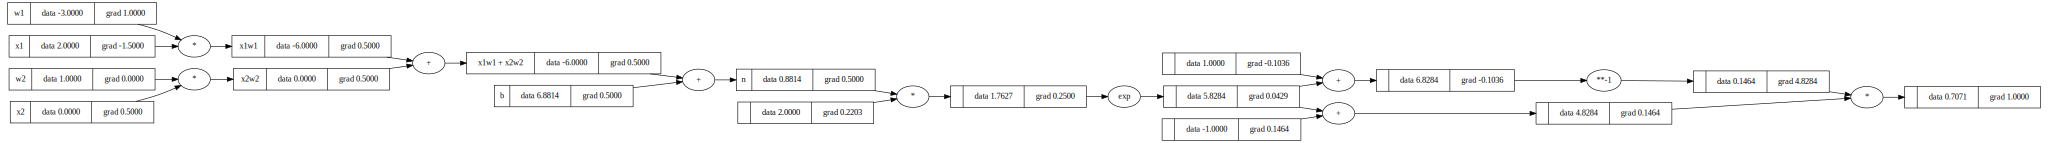

In [101]:
x1 = Value(2.0, label="x1")
w1 = Value(-3.0, label="w1")
x2 = Value(0.0, label="x2")
w2 = Value(1.0, label="w2")
b = Value(6.88137, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b
n.label = "n"




# -----------------------------------------------------
# o = n.tanh()
e = (2*n).exp()
o =( e-1)/(e+1)
# ---------------------------------------------------
# print(o)
# print(n._op)
o.backward()
draw_dot(o)

In [102]:
import random
class Neuron:
    def __init__(self, nin) -> None:
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        

    def __call__(self, x):
        if len(x) != len(self.w):
            raise ValueError(f"Expected input of length {len(self.w)}, but got {len(x)}.")
        
        act = sum((xi*wi for xi, wi in zip(x , self.w)), start=self.b)
        # print(act)
        out= act.tanh()
        return out
            # print(i.data, j.data)

    def parameters(self):
        return self.w + [self.b]

neu = Neuron(nin =3)
neu.w
x= neu(neu.w)
neu.parameters()

[Value(data=-0.6002932703173502),
 Value(data=-0.3206442143729209),
 Value(data=-0.4282929186735609),
 Value(data=-0.028287814069053452)]

In [103]:
from typing import Any


class Layer():
    def __init__(self, nin, nout) -> None:
        self.neurons = [ Neuron(nin=nin) for _ in range(nout)]

    def __call__(self, x) -> Any:
        if len(x) != len(self.neurons[0].w):
            raise ValueError(f"Expected input of length {len(self.neurons[0].w)}, but got {len(x)}.")
        
        outs = [n(x) for n in self.neurons]
        # print(outs)
        return outs[0] if len(outs) ==1 else outs
    
    def parameters(self):
        params =[]
        for neuron in self.neurons:
            ps= neuron.parameters()
            params.extend(ps)
        return params
        

l = Layer(nin =3,nout = 1)
l([1.0,2.0,4.0])

Value(data=-0.9952537022848427)

In [104]:
from typing import Any, List


class MLP:
    def __init__(self, nin:int, nouts: List[int]) -> None: # nout of each layer
        sz:list = [nin] + nouts  # [nin, ]
        self.layers: List[Layer] = [ Layer(sz[i], sz[i+1])  for i in range(len(nouts))]
    

    def __call__(self, x) -> Any:
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        params =[]
        for layer in self.layers:
            ps= layer.parameters()
            params.extend(ps)
        return params
    
    
# Create an instance of MLP
n = MLP(3, [4, 4 ,1])  # An MLP with 3 inputs, first layer with 4 neurons, second layer with 5 neurons, and third layer with 2 neurons

# Call the MLP with an input vector
x = [2.0, 3.0, -1.0]

print(n(x))  # Print the output

Value(data=-0.7059429876060486, label=)


In [105]:
n.parameters()

[Value(data=0.18747117234100852),
 Value(data=-0.03231058438668044),
 Value(data=-0.6492685971512324),
 Value(data=0.13966322904152584),
 Value(data=-0.005785943452230935),
 Value(data=0.9790742588393637),
 Value(data=-0.871540595735508),
 Value(data=-0.49502732686727424),
 Value(data=-0.20244097060532917),
 Value(data=0.5786068378526081),
 Value(data=0.8187440321704689),
 Value(data=-0.6689959442573716),
 Value(data=0.9424695211051217),
 Value(data=-0.6643183624255455),
 Value(data=0.7823337032215361),
 Value(data=-0.8422917530120377),
 Value(data=0.9003703196089132),
 Value(data=-0.09031115211760854),
 Value(data=-0.8009293669691173),
 Value(data=0.20277368002849427),
 Value(data=0.9375897997415672),
 Value(data=-0.980057462243638),
 Value(data=-0.03172025843705284),
 Value(data=-0.42921099274262065),
 Value(data=0.46148471848758654),
 Value(data=0.30577997202740037),
 Value(data=0.25520844176115065),
 Value(data=-0.4876110207195996),
 Value(data=-0.9759864537938441),
 Value(data=-0.

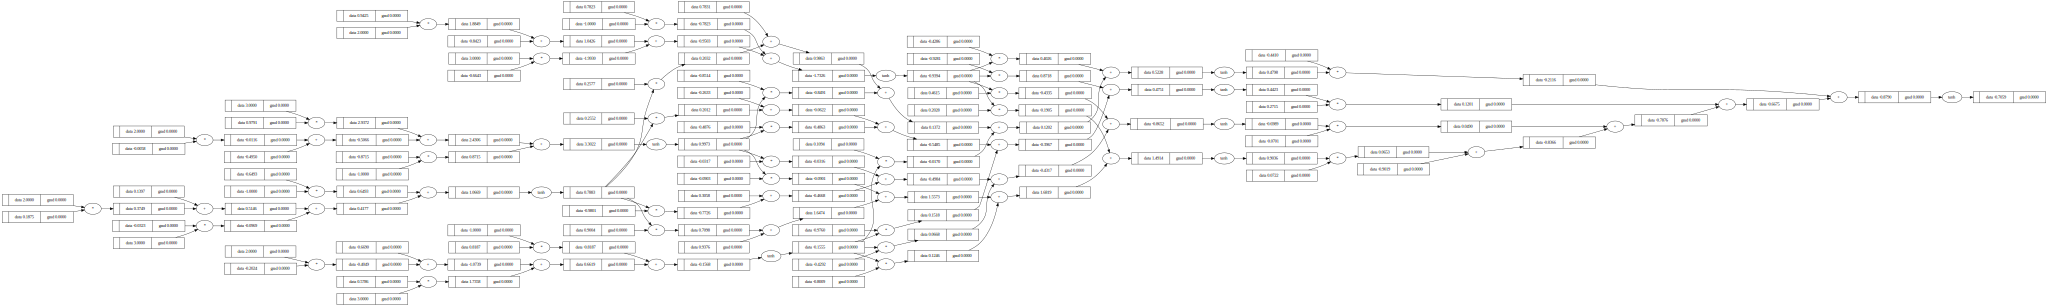

In [106]:
draw_dot(n(x))

In [107]:
xs =[
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]

]
ys = [1.0, -1.0, -1.0, 1.0]



for k in range(30):
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    for p in n.parameters():
        p.grad=0.0
    loss.backward()

    # optimization
    for p in n.parameters():
        p.data+= -0.05 * p.grad

    print(k, loss.data)



print(f"\n\nresults: ")

for ygt, yout in zip(ys, ypred):
    print(f"\tygt: {ygt} ; yout:{yout.data}")

0 5.707392656353334
1 3.0418573274717375
2 0.8400490132146999
3 0.4977875504820364
4 0.32231747760201845
5 0.2287431076096037
6 0.17376042316817164
7 0.13852195837710024
8 0.11436219080104282
9 0.09692052826108492
10 0.08381366498128659
11 0.07364617266232314
12 0.06555357378663818
13 0.05897481175596862
14 0.05353136643930613
15 0.048959390964591606
16 0.04506978202741562
17 0.04172371979609173
18 0.03881715281694422
19 0.03627065322032263
20 0.03402260401147111
21 0.032024514746130335
22 0.030237732251802547
23 0.028631087049040042
24 0.02717918050649384
25 0.025861119028244457
26 0.02465956546596937
27 0.023560019147837247
28 0.02255026301237144
29 0.02161993448190104


results: 
	ygt: 1.0 ; yout:0.9278357196875396
	ygt: -1.0 ; yout:-0.9146003115838675
	ygt: -1.0 ; yout:-0.9491822538669046
	ygt: 1.0 ; yout:0.9191501328061361


# Extra

In [108]:
# minimize loss

ypred = [n(x) for x in xs]


loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss
loss.backward()

In [109]:
n.layers[0].neurons[0].w[0].data, n.layers[0].neurons[0].w[0].grad

(0.015952230163051577, 0.047183822353496635)

In [110]:
for p in n.parameters():
    p.data+= -0.01 * p.grad

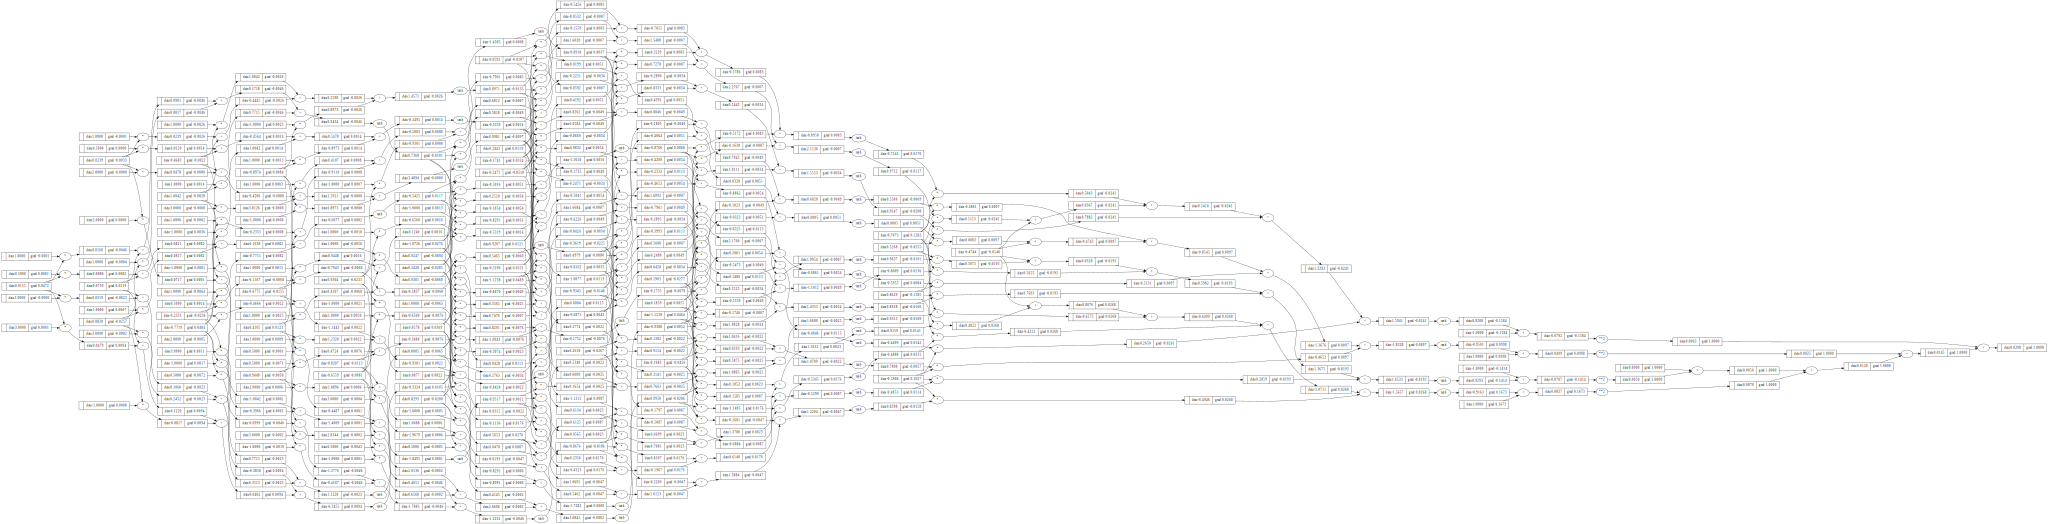

In [111]:
draw_dot(loss)

In [112]:
import random
random.uniform(-1,1)

0.46591989400865574

In [113]:
a =[ 1,2,3] 
b = [chr(97), chr(98), chr(99)]
for i,j in zip(a,b):
    print(i,j)


1 a
2 b
3 c


## extra

In [114]:
a-b

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
a = Value(3.0)
b = a+a
b.backward()
draw_dot(b)

In [ ]:
a = Value(-2.0)
b = Value(3.0)
d= a*b
e = a+b
f =d*e
f.backward()
draw_dot(f)

# whenver a variable is use multiple itimes, gradients wont be right... because we are not accumulating gradients

In [ ]:
# manual iteration of backward
o.grad = 1.0
# n._backward
# n.grad

o._backward()
n._backward()  # will propagate gradients to  x1w1x2w2 and b
b._backward()  # b is lead node.. so no propagation will happens, its just empty function
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
draw_dot(o)

In [ ]:
o.grad =1.0

# --------------------------------------
# tanh
# do/dn = 1-tanh(n)**2
# do/dn = 1-o**2    # tanh(n)
o.data
1-(o.data)**2
n.grad = 0.5


#  ----------------------------------------
# addition is just flow of grqadinet , mean gradient will flow to both of nodes equally
x1w1x2w2.grad = 0.5  # becuase addition gives 1 and this 0.5 comes from chain rule
b.grad =0.5


# ---------------------------------------------------

x1w1.grad = 0.5
x2w2.grad = 0.5


# -------------------------------------------------------

x2.grad = w2.data * x2w2.grad  # x2 and w2 are zero becasue if x2 is zero(mean no effect) then w2 has to be zero
w2.grad = x2.data * x2w2.grad

x1.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad


# -------------------------



In [ ]:
a= Value(2.0, label="a")
b= Value(-3.0, label="b")
c= Value(10.0, label="c")
e = a * b; e.label="e"
d = e +c;d.label = "d"
f = Value(-2.0, label='f')
L=d*f; L.label = "L"
# print(a,b,c,d)
print(L)

draw_dot(L)




In [ ]:
# deerivative with self
def lwl():
    h=0.1
    a= Value(2.0, label="a")
    b= Value(-3.0, label="b")
    c= Value(10.0, label="c")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L=d*f; L.label = "L1"
    # print(a,b,c,d)
    # print(L)
    L1 = L.data
    # step ii
    
    L2=L1+h; L.label = "L2"
    # L+=h
    
    
    print((L2-L1)/h)
    

    
lwl()

# so,
L.grad = 1




In [ ]:
# deerivative with d

#L = d*f
#L/dd = f
#L/df = d

#L = d+f
#L/dd = 1
#L/df = 1


def lwd():
    
    h=0.1
    a= Value(2.0, label="a")
    b= Value(-3.0, label="b")
    c= Value(10.0, label="c")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L=d*f; L.label = "L1"
    # print(a,b,c,d)
    # print(L)
    L1 = L.data
    # step ii
    
    
    d = (e +c)+h;d.label = "d"
    f = Value(-2.0, label='f')
    L2=(d*f).data; L.label = "L2"
    
    
    
    # L+=h
    
    
    print((L2-L1)/h)
    

    
lwd()

# so,
d.grad = -1.999999999999993
"""
*
    L = d*f
    L/dd = f
    L/df = d
+
    L = d+f
    L/dd = 1
    L/df = 1
    
    
    d = c + e
    dd/dc =1
    dd/de =1
    
chain
    dL/dc = dL/dd * dd/dc
    dL/dc = -2 * 1
    dL/dc = -2
    
    so c.grad = -2
    
    
    for a :
    
    e = a*b
    de/da = b
    de/db = a
    
    
    dL/da = dL/dd * dd/de * de/da
    dL/da = -2 * 1 * -3.0
    dL/da = 6
    
    dL/db = dL/dd * dd/de * de/db
    dL/db = -2 * 1 * 2.0
    dL/db = -4
    
"""

d.grad = -2 # value of f
f.grad = 4.0 # value of d
c.grad = -2
e.grad = -2
a.grad = 6.0
b.grad = -4

# for multiplication: When differentiating with respect to one variable, the other variable is treated as a constant, leading to the result that the derivative is simply the other variable.
# for addition: both wil be one 


In [ ]:
draw_dot(L)

In [ ]:
# deerivative with a
def lwa():
    h=0.1
    a= Value(2.0, label="a")
    b= Value(-3.0, label="b")
    c= Value(10.0, label="c")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L=d*f; L.label = "L1"
    # print(a,b,c,d)
    # print(L)
    L1 = L.data
    # step ii
    
    
    a= Value(2.0+h, label="a")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L2=(d*f).data; L.label = "L2"
    
    
    
    # L+=h
    
    
    print((L2-L1)/h)
    

    
lwa()

# so,
a.grad = 6.000000000000014




In [ ]:
    draw_dot(L)

### optimizing


In [ ]:
# trying to make L go up
# to make L go up we need to go in direction of gradient


a.data +=  a.grad * 0.1 # to nudge the value in gradient direction increases L.

# deerivative with a
def nudging():
    h=0.1
    a= Value(2.0, label="a")
    b= Value(-3.0, label="b")
    c= Value(10.0, label="c")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L=d*f; L.label = "L1"
    # print(a,b,c,d)
    # print(L)
    L1 = L.data
    print("a:", a)
    print("b:", b)
    print("c:", c)
    print("d:", d)
    print("e:", e)
    print("f:", f)
    
    print("L1:", L1,"\n")
    # step ii
    
    
    
    # d.grad = -2 # value of f
    f.grad = 4.0 # value of d
    c.grad = -2
    # e.grad = -2
    a.grad = 6.0
    b.grad = -4
    print("a.grad:", a.grad)
    print("b.grad:", b.grad)
    print("c.grad:", c.grad)
    print("d.grad:", d.grad)
    print("e.grad:", e.grad)
    print("f.grad:", f.grad)
    for i in range(3):
        a.data +=  a.grad * 0.1
        b.data +=  b.grad * 0.1
        c.data +=  c.grad * 0.1
        f.data +=  f.grad * 0.1
        e = a * b; e.label="e"
        d = e +c;d.label = "d"
        f = Value(-2.0, label='f')
        L2=(d*f).data; L.label = "L2"
    
    
        print("a:", a)
        print("b:", b)
        print("c:", c)
        print("d:", d)
        print("e:", e)
        print("f:", f)
        print("increasing L:", L2, "\n\n\n")

    
    
    # L+=h
    
    
    # print((L2-L1)/h)
    

    
nudging()






## Extra


In [ ]:

# print(Value(2))
a = Value(2.0)
b = Value(3.0)
a*(1/12)
-12.0+a
a*(-b)
a+2.0

In [ ]:
a.__add__(b), a.__mul__(b)

In [ ]:
type(-12)
-12.0 +a

In [ ]:
x = Value(2.0)
-1.0 + x

In [ ]:
c= a+b
d = 5* c
d, d._prev,d._op, c._prev, c._op

In [ ]:
class MyClass:
    def __init__(current, value):
        current.value = value

    def print_value(current):
        print(current.value)

obj = MyClass(42)
obj.print_value()  # prints 42
